In [4]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
f ='zhivi-i-pomni-6.txt'
data = gensim.models.word2vec.LineSentence(f)

In [58]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2, epochs=5)

2021-09-25 02:09:19,108 : INFO : collecting all words and their counts
2021-09-25 02:09:19,109 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 02:09:19,112 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 02:09:19,112 : INFO : Creating a fresh vocabulary
2021-09-25 02:09:19,114 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 575 unique words (34.06398104265403%% of original 1688, drops 1113)', 'datetime': '2021-09-25T02:09:19.114396', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 02:09:19,115 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 4230 word corpus (79.16900617630544%% of original 5343, drops 1113)', 'datetime': '2021-09-25T02:09:19.115393', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 

Wall time: 63.8 ms


In [59]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 02:09:26,899 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 02:09:26,900 : INFO : storing 575x300 projection weights into zhivi.bin


Saving model...


In [60]:
print(len(model_zhivi.wv.key_to_index))

575


In [61]:
print(sorted([w for w in model_zhivi.wv.key_to_index]))

['а', 'ангар', 'ангара', 'андрей', 'атамановка', 'атамановский', 'баба', 'баня', 'без', 'белье', 'берег', 'бессильно', 'близко', 'близость', 'бок', 'более', 'боль', 'больно', 'больше', 'большой', 'бояться', 'будто', 'бурдак', 'бы', 'быстро', 'быть', 'в', 'вверх', 'вдруг', 'везти', 'вернуться', 'весь', 'вечер', 'вечный', 'взять', 'взяться', 'вид', 'видеть', 'видно', 'видный', 'вниз', 'во', 'вода', 'воевать', 'воздух', 'возле', 'война', 'ворчать', 'воспоминание', 'вот', 'вперед', 'время', 'все', 'всегда', 'вспомнить', 'встреча', 'встречаться', 'всякий', 'входить', 'выживать', 'выпадать', 'высыпаться', 'выходить', 'где', 'герой', 'глаз', 'глухой', 'говорить', 'год', 'голова', 'голос', 'горький', 'горючее', 'госпиталь', 'господи', 'гуськов', 'да', 'давать', 'давно', 'даже', 'далеко', 'два', 'дверка', 'дверь', 'двор', 'девчонка', 'делать', 'дело', 'день', 'деревня', 'дерево', 'держать', 'держаться', 'десяток', 'детство', 'для', 'до', 'добираться', 'добрый', 'догадываться', 'дождаться', 'дол

In [62]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('в', 0.4042279124259949),
 ('ангара', 0.39697664976119995),
 ('как', 0.396101176738739)]

In [63]:
model_zhivi.wv.most_similar("живой", topn=3)

[('хотеть', 0.21144670248031616),
 ('близость', 0.20804202556610107),
 ('кто', 0.20143777132034302)]

In [64]:
model_zhivi.wv.similarity("снег", "вода")

0.30923486

In [47]:
model_zhivi.wv.similarity("снег", "снег")

1.0

In [48]:
model_zhivi.wv.doesnt_match("скорбь грусть слеза улыбка".split())

2021-09-25 01:58:02,435 : WARNING : vectors for words {'улыбка', 'скорбь', 'грусть'} are not present in the model, ignoring these words


'слеза'

We can increase the value of window to see what will happen to the result.

In [100]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=300, window=10, min_count=2, epochs=5)

2021-09-25 03:10:42,568 : INFO : collecting all words and their counts
2021-09-25 03:10:42,570 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 03:10:42,572 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 03:10:42,573 : INFO : Creating a fresh vocabulary
2021-09-25 03:10:42,575 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 575 unique words (34.06398104265403%% of original 1688, drops 1113)', 'datetime': '2021-09-25T03:10:42.575893', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 03:10:42,575 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 4230 word corpus (79.16900617630544%% of original 5343, drops 1113)', 'datetime': '2021-09-25T03:10:42.575893', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 

Wall time: 61.8 ms


In [101]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 03:10:46,185 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 03:10:46,186 : INFO : storing 575x300 projection weights into zhivi.bin


Saving model...


In [103]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('ангара', 0.6294587850570679),
 ('в', 0.6282918453216553),
 ('по', 0.625654935836792)]

In [104]:
model_zhivi.wv.most_similar("живой", topn=3)

[('хотеть', 0.27827394008636475),
 ('близость', 0.2733249068260193),
 ('кто', 0.2708781361579895)]

In [105]:
model_zhivi.wv.most_similar("слеза", topn=3)

[('берег', 0.46046608686447144),
 ('бы', 0.45828545093536377),
 ('уже', 0.4543607831001282)]

In [106]:
model_zhivi.wv.similarity("снег", "вода")

0.5796386

The similarity increased.

In [56]:
model_zhivi.wv.doesnt_match("скорбь грусть слеза улыбка".split())

2021-09-25 02:08:18,194 : WARNING : vectors for words {'улыбка', 'скорбь', 'грусть'} are not present in the model, ignoring these words


'слеза'

In [110]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=300, window=2, min_count=2, epochs=5)

2021-09-25 03:16:12,449 : INFO : collecting all words and their counts
2021-09-25 03:16:12,451 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 03:16:12,455 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 03:16:12,455 : INFO : Creating a fresh vocabulary
2021-09-25 03:16:12,457 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 575 unique words (34.06398104265403%% of original 1688, drops 1113)', 'datetime': '2021-09-25T03:16:12.457316', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 03:16:12,458 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 4230 word corpus (79.16900617630544%% of original 5343, drops 1113)', 'datetime': '2021-09-25T03:16:12.458329', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 

Wall time: 61.8 ms


In [111]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 03:16:16,834 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 03:16:16,835 : INFO : storing 575x300 projection weights into zhivi.bin


Saving model...


In [112]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('рука', 0.2061190903186798),
 ('ангара', 0.20223258435726166),
 ('устраивать', 0.2016851007938385)]

In [113]:
model_zhivi.wv.most_similar("живой", topn=3)

[('близость', 0.1832650601863861),
 ('хотеть', 0.18302297592163086),
 ('кто', 0.18100076913833618)]

In [114]:
model_zhivi.wv.most_similar("слеза", topn=3)

[('находить', 0.2246973216533661),
 ('иркутск', 0.18816065788269043),
 ('всякий', 0.15732118487358093)]

In [115]:
model_zhivi.wv.similarity("снег", "вода")

0.170358

The similarity decreased, so it's better to choose 8 as the value of window.
Because there are only 575 words, for saving more data, we can decrease the min_count to 1 to see the changes.

In [65]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=300, window=8, min_count=1, epochs=5)

2021-09-25 02:20:38,913 : INFO : collecting all words and their counts
2021-09-25 02:20:38,914 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 02:20:38,917 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 02:20:38,918 : INFO : Creating a fresh vocabulary
2021-09-25 02:20:38,923 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 1688 unique words (100.0%% of original 1688, drops 0)', 'datetime': '2021-09-25T02:20:38.923690', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 02:20:38,923 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 5343 word corpus (100.0%% of original 5343, drops 0)', 'datetime': '2021-09-25T02:20:38.923690', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 6

Wall time: 101 ms


In [108]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 03:14:47,432 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 03:14:47,434 : INFO : storing 575x300 projection weights into zhivi.bin


Saving model...


In [66]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 02:21:05,021 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 02:21:05,023 : INFO : storing 1688x300 projection weights into zhivi.bin


Saving model...


In [67]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('а', 0.330352783203125),
 ('с', 0.32338014245033264),
 ('быть', 0.3215075135231018)]

In [68]:
model_zhivi.wv.most_similar("живой", topn=3)

[('добывать', 0.21877023577690125),
 ('втроем', 0.21272563934326172),
 ('ворчать', 0.2100210189819336)]

These three words are far from the given word senmantically.

In [69]:
model_zhivi.wv.similarity("снег", "вода")

0.123030275

In [ ]:
This similarity decreased. 

In [70]:
model_zhivi.wv.doesnt_match("скорбь грусть слеза улыбка".split())

2021-09-25 02:22:45,538 : WARNING : vectors for words {'улыбка', 'скорбь', 'грусть'} are not present in the model, ignoring these words


'слеза'

From the result, decrease the min-count is not a good idea. But how about increasing it?

In [71]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=300, window=8, min_count=3, epochs=5)

2021-09-25 02:35:40,904 : INFO : collecting all words and their counts
2021-09-25 02:35:40,905 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 02:35:40,908 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 02:35:40,908 : INFO : Creating a fresh vocabulary
2021-09-25 02:35:40,910 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 343 unique words (20.319905213270143%% of original 1688, drops 1345)', 'datetime': '2021-09-25T02:35:40.910990', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 02:35:40,910 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 leaves 3766 word corpus (70.48474639715516%% of original 5343, drops 1577)', 'datetime': '2021-09-25T02:35:40.910990', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30

Wall time: 53.9 ms


In [72]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 02:36:03,682 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 02:36:03,683 : INFO : storing 343x300 projection weights into zhivi.bin


Saving model...


In [73]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

KeyError: "Key 'страшный' not present"

This error means the word 'страшный' only shows up 2 times, so when min_count increase to 3, there are no this word which can get involved in the model.

In [74]:
model_zhivi.wv.most_similar("живой", topn=3)

[('уходить', 0.24894332885742188),
 ('раз', 0.23829743266105652),
 ('время', 0.23623281717300415)]

In [75]:
model_zhivi.wv.similarity("снег", "вода")

0.51573676

In [77]:
model_zhivi.wv.doesnt_match("скорбь грусть слеза улыбка".split())

2021-09-25 02:42:05,231 : WARNING : vectors for words {'улыбка', 'скорбь', 'слеза', 'грусть'} are not present in the model, ignoring these words


ValueError: cannot select a word from an empty list

It seems the four words "скорбь" "грусть" "слеза" "улыбка" can't not get involved in thid modle beacuse they appear only twice.
So it's better to keep the min_count to 2.
We can change the vector_sive, firstly, decrease it to 100.

In [78]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=100, window=8, min_count=2, epochs=5)

2021-09-25 02:47:29,272 : INFO : collecting all words and their counts
2021-09-25 02:47:29,273 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 02:47:29,276 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 02:47:29,277 : INFO : Creating a fresh vocabulary
2021-09-25 02:47:29,279 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 575 unique words (34.06398104265403%% of original 1688, drops 1113)', 'datetime': '2021-09-25T02:47:29.279693', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 02:47:29,279 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 4230 word corpus (79.16900617630544%% of original 5343, drops 1113)', 'datetime': '2021-09-25T02:47:29.279693', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 

Wall time: 55.9 ms


In [79]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 02:47:50,810 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 02:47:50,811 : INFO : storing 575x100 projection weights into zhivi.bin


Saving model...


In [80]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('настена', 0.6089780926704407),
 ('к', 0.6007078289985657),
 ('у', 0.5860733985900879)]

In [81]:
model_zhivi.wv.most_similar("живой", topn=3)

[('неожиданно', 0.3221656084060669),
 ('хвататься', 0.2666647732257843),
 ('снег', 0.26443248987197876)]

These three words are far from the given word senmantically.

In [82]:
model_zhivi.wv.similarity("снег", "вода")

0.45341346

In [83]:
model_zhivi.wv.doesnt_match("скорбь грусть слеза улыбка".split())

2021-09-25 02:51:37,377 : WARNING : vectors for words {'улыбка', 'скорбь', 'грусть'} are not present in the model, ignoring these words


'слеза'

So it's better not to decrease the vector_size. But how about increasing it?

In [84]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=400, window=8, min_count=2, epochs=5)

2021-09-25 02:53:41,871 : INFO : collecting all words and their counts
2021-09-25 02:53:41,874 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 02:53:41,876 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 02:53:41,876 : INFO : Creating a fresh vocabulary
2021-09-25 02:53:41,878 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 575 unique words (34.06398104265403%% of original 1688, drops 1113)', 'datetime': '2021-09-25T02:53:41.878903', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 02:53:41,879 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 4230 word corpus (79.16900617630544%% of original 5343, drops 1113)', 'datetime': '2021-09-25T02:53:41.879901', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 

Wall time: 65.8 ms


In [85]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 02:53:56,187 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 02:53:56,188 : INFO : storing 575x400 projection weights into zhivi.bin


Saving model...


In [86]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('в', 0.4766565263271332),
 ('же', 0.4714948534965515),
 ('мочь', 0.47109144926071167)]

In [87]:
model_zhivi.wv.most_similar("живой", topn=3)

[('вода', 0.24776023626327515),
 ('год', 0.23349589109420776),
 ('жить', 0.23108722269535065)]

It seems that the three words are semantically close to the given word.

In [88]:
model_zhivi.wv.similarity("снег", "вода")

0.41135502

In [89]:
model_zhivi.wv.doesnt_match("скорбь грусть слеза улыбка".split())

2021-09-25 02:56:16,521 : WARNING : vectors for words {'улыбка', 'скорбь', 'грусть'} are not present in the model, ignoring these words


'слеза'

So we can choose 400 as the value of vector_size.
We can decrease the epoch to see the changes.

In [116]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=400, window=8, min_count=2, epochs=1)

2021-09-25 03:24:22,912 : INFO : collecting all words and their counts
2021-09-25 03:24:22,914 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 03:24:22,917 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 03:24:22,918 : INFO : Creating a fresh vocabulary
2021-09-25 03:24:22,920 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 575 unique words (34.06398104265403%% of original 1688, drops 1113)', 'datetime': '2021-09-25T03:24:22.920012', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 03:24:22,920 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 4230 word corpus (79.16900617630544%% of original 5343, drops 1113)', 'datetime': '2021-09-25T03:24:22.920012', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 

Wall time: 29.9 ms


In [117]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 03:24:35,169 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 03:24:35,170 : INFO : storing 575x400 projection weights into zhivi.bin


Saving model...


In [118]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('половина', 0.14263422787189484),
 ('ребятишки', 0.12214766442775726),
 ('свекровь', 0.12069561332464218)]

In [119]:
model_zhivi.wv.most_similar("живой", topn=3)

[('маленький', 0.13749364018440247),
 ('вода', 0.13242684304714203),
 ('местный', 0.13177846372127533)]

In [120]:
model_zhivi.wv.similarity("снег", "вода")

0.02252883

The similarity decreased to a very small value, it means we can't choose 1 as tthe value of epoch.But how about increasing it?

In [138]:
%time model_zhivi = gensim.models.Word2Vec(data, vector_size=400, window=8, min_count=2, epochs=10)

2021-09-25 04:03:15,280 : INFO : collecting all words and their counts
2021-09-25 04:03:15,281 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-25 04:03:15,284 : INFO : collected 1688 word types from a corpus of 5343 raw words and 385 sentences
2021-09-25 04:03:15,285 : INFO : Creating a fresh vocabulary
2021-09-25 04:03:15,287 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 575 unique words (34.06398104265403%% of original 1688, drops 1113)', 'datetime': '2021-09-25T04:03:15.287703', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
2021-09-25 04:03:15,287 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 4230 word corpus (79.16900617630544%% of original 5343, drops 1113)', 'datetime': '2021-09-25T04:03:15.287703', 'gensim': '4.1.2', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 

Wall time: 116 ms


In [122]:
model_zhivi.init_sims(replace=True)
model_path = "zhivi.bin"

print("Saving model...")
model_zhivi.wv.save_word2vec_format(model_path, binary=True)

2021-09-25 03:30:35,992 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-25 03:30:35,993 : INFO : storing 575x400 projection weights into zhivi.bin


Saving model...


In [123]:
model_zhivi.wv.most_similar(positive=["смерть", "страшный"], negative=["живой"], topn=3)

[('жизнь', 0.9599876999855042),
 ('страх', 0.9598274827003479),
 ('половина', 0.9597858786582947)]

In [124]:
model_zhivi.wv.most_similar("живой", topn=3)

[('вода', 0.9625073671340942),
 ('жить', 0.9622183442115784),
 ('год', 0.962167501449585)]

In [125]:
model_zhivi.wv.similarity("снег", "вода")

0.9961269

In [126]:
model_zhivi.wv.doesnt_match("скорбь грусть слеза улыбка".split())

2021-09-25 03:32:35,863 : WARNING : vectors for words {'улыбка', 'скорбь', 'грусть'} are not present in the model, ignoring these words


'слеза'

Ok. I found the suitable parameters of the settings.

In [128]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=73122deb1c63c33da625c50fb2a223ae5b1777256793e6e54559665e537917a7
  Stored in directory: c:\users\wanshu\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [139]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
words = ['жить', 'смерть', 'понятно','ясный', 'страшный', 'маленький', 'большой']
X = model_zhivi.wv[words]

In [150]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

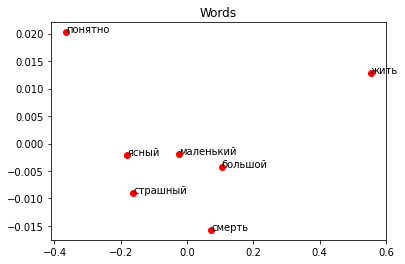

In [151]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

From the plot we can see the 'маленький', 'большой' are closter together.

In [165]:
pca = PCA(n_components=2)
pca.fit(model_zhivi.wv[list(model_zhivi.wv.key_to_index)])
coords = pca.transform(model_zhivi.wv[words])

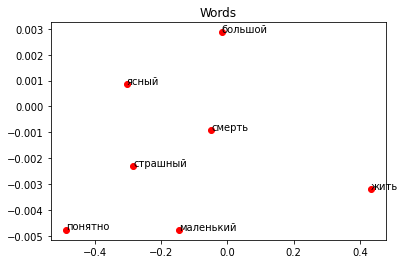

In [166]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

Now all of the words are not close to each other.